In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
#from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, HashingVectorizer
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_absolute_error
from sklearn import pipeline, preprocessing, feature_extraction
from sklearn.ensemble import RandomForestRegressor , GradientBoostingRegressor
#from lightgbm import LGBMClassifier
from xgboost  import XGBRegressor
from sklearn import model_selection, datasets, linear_model, metrics
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold
import seaborn as sns
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
train = pd.read_csv('data/Train.csv')
test = pd.read_csv('data/Test.csv')

In [7]:
train

,id,date,street_id,build_tech,floor,area,rooms,balcon,metro_dist,g_lift,...,kw6,kw7,kw8,kw9,kw10,kw11,kw12,kw13,price,logprice
0,0,2011-01-01,531,NaN,12,35,1,1,25.0,NaN,...,0,0,0,0,0,0,0,0,3721000,15.129503
1,1,2011-01-01,385,2.0,15,46,1,2,15.0,1.0,...,0,0,0,0,0,0,0,0,7431000,15.821171
2,2,2011-01-01,51,0.0,1,53,3,0,30.0,0.0,...,0,0,0,0,0,0,0,0,3081000,14.940765
3,3,2011-01-01,76,0.0,1,60,3,0,30.0,0.0,...,0,0,0,0,0,0,0,0,3847000,15.162804
4,4,2011-01-01,114,0.0,2,43,2,0,30.0,0.0,...,0,0,0,0,0,0,0,0,2323000,14.658370
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99995,2012-06-01,494,0.0,3,44,2,0,30.0,1.0,...,0,0,0,0,0,0,0,0,2272000,14.636171
99996,99996,2012-06-01,192,0.0,21,58,2,0,20.0,0.0,...,0,0,0,0,0,0,0,0,8040000,15.899940
99997,99997,2012-06-01,469,NaN,1,33,1,0,25.0,NaN,...,0,0,0,0,0,0,0,0,2555000,14.753563
99998,99998,2012-06-01,294,0.0,9,51,2,0,20.0,0.0,...,0,0,0,0,0,0,0,0,2155000,14.583301


In [3]:
train['logprice']=np.log(train['price'])

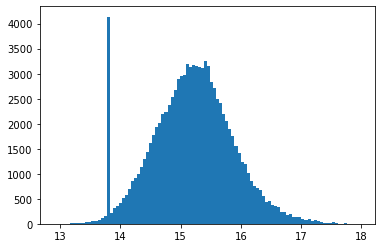

In [4]:
plt.hist((train['logprice'].values), bins=100)
plt.show()

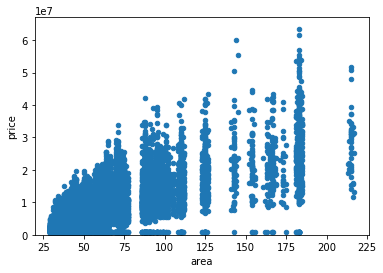

In [14]:
var = 'area'
data = pd.concat([train['price'], train[var]], axis=1)
data.plot.scatter(x=var, y='price', ylim=(0,67000000));

In [5]:
train=train[(train.price!=1000000)]

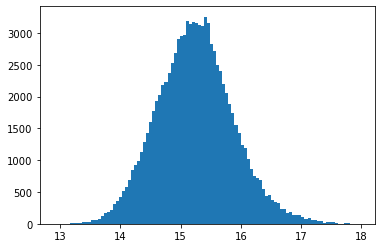

In [6]:
plt.hist((train['logprice'].values), bins=100)
plt.show()

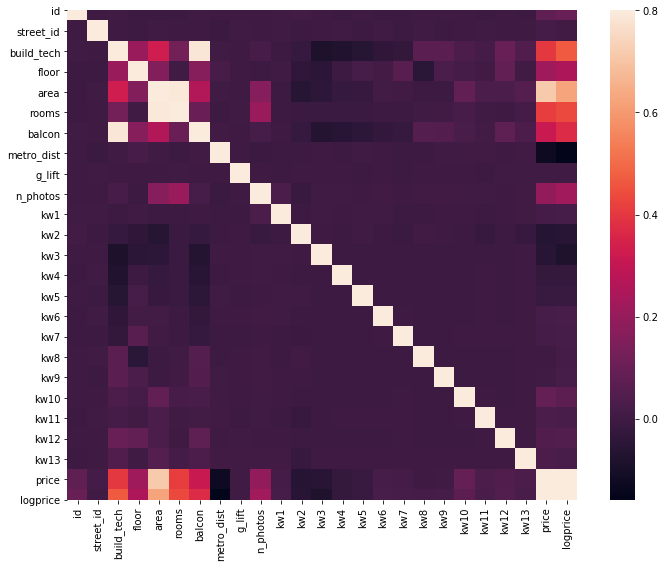

In [7]:
corrmat = train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

In [8]:
train.drop('date', axis= 1, inplace=True)
train.drop('id', axis= 1, inplace=True)

In [10]:
train_data, test_data, train_labels, test_labels = model_selection.train_test_split(train.drop(['price','logprice','kw2','build_tech'], axis=1), train.logprice,  
                                                                                     test_size = 0.2, random_state = 1354)

In [12]:
reg = XGBRegressor(learning_rate=1, max_depth=5, n_estimators=100, loss='huber')

reg.fit(train_data,train_labels )

[18:11:50] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=1, loss='huber',
             max_delta_step=0, max_depth=5, min_child_weight=1, missing=None,
             n_estimators=100, n_jobs=1, nthread=None, objective='reg:linear',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)

In [13]:
y_pred = reg.predict(test_data)
metrics.mean_absolute_error((np.exp(test_labels)), np.exp(y_pred))

628046.3048115467

# Test

In [24]:
test.drop('date', axis= 1, inplace=True)
test.drop('id', axis= 1, inplace=True)

In [25]:
reg = XGBRegressor(learning_rate=0.1, max_depth=15, n_estimators=100, loss='huber')
reg.fit(train.drop(['price','logprice','kw2','build_tech'],axis = 1), train['logprice'])

[14:55:33] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, loss='huber',
             max_delta_step=0, max_depth=15, min_child_weight=1, missing=None,
             n_estimators=100, n_jobs=1, nthread=None, objective='reg:linear',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)

In [27]:
test.drop('kw2', axis= 1, inplace=True)
test.drop('build_tech', axis= 1, inplace=True)

In [28]:
test_pred = reg.predict(test)
test['logprice'] = test_pred

In [29]:
test['id']=range(100000,200000)


In [32]:
test['price']=(np.exp(test.logprice))

In [33]:
test

,street_id,floor,area,rooms,balcon,metro_dist,g_lift,n_photos,kw1,kw3,...,kw7,kw8,kw9,kw10,kw11,kw12,kw13,logprice,id,price
0,427,9,60,3,1,30.0,0.0,5,1,0,...,0,0,0,0,0,0,0,15.208816,100000,4028141.250
1,593,7,52,2,1,20.0,0.0,5,0,0,...,0,0,0,0,0,0,0,15.963542,100001,8567975.000
2,91,4,58,3,0,30.0,NaN,2,0,0,...,0,0,0,0,0,0,0,14.840533,100002,2787158.750
3,224,8,60,3,1,30.0,0.0,4,0,0,...,0,0,0,0,0,0,0,15.781903,100003,7144856.500
4,426,2,54,3,0,30.0,1.0,2,0,1,...,0,0,0,0,0,0,0,14.443160,100004,1873202.375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,594,1,52,2,1,30.0,NaN,0,0,0,...,0,0,0,0,0,0,0,15.411781,199995,4934595.500
99996,21,1,59,3,0,30.0,0.0,7,0,0,...,0,0,0,0,0,0,0,15.222399,199996,4083229.500
99997,193,8,59,3,0,25.0,0.0,0,0,0,...,0,0,0,0,0,0,0,15.510849,199997,5448489.500
99998,19,2,33,1,1,25.0,0.0,1,0,0,...,0,0,0,0,0,0,0,14.976636,199998,3193525.250


In [34]:
test[['id', 'price']].to_csv("SampleSubmission.csv", index=False)